随着训练样本的逐渐增多，算法训练出的模型的表现能力

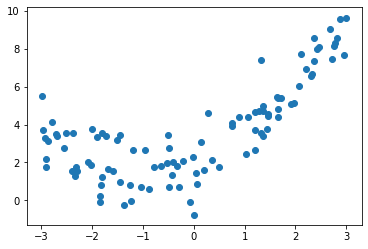

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)

# 学习曲线

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [3]:
X_train.shape

(75, 1)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    ## 基于训练数据集的预测结果
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    ## 基于测试数据集的预测结果
    y_test_predict = lin_reg.predict(X_test[:i])
    test_score.append(mean_squared_error(y_test[:i], y_test_predict))

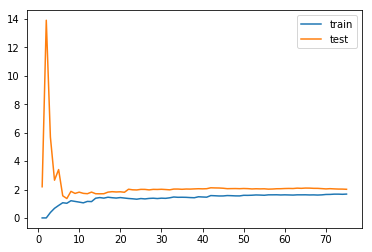

In [32]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()

In [48]:
### 封装
def plot_learning_curve(model, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        model.fit(X_train[:i], y_train[:i])

        ## 基于训练数据集的预测结果
        y_train_predict = model.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        ## 基于测试数据集的预测结果
        y_test_predict = model.predict(X_test[:i])
        test_score.append(mean_squared_error(y_test[:i], y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

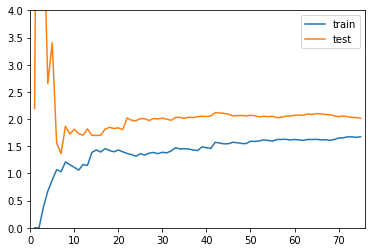

In [49]:
plot_learning_curve(lin_reg, X_train, X_test, y_train, y_test)

# 使用多项式回归的学习曲线

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

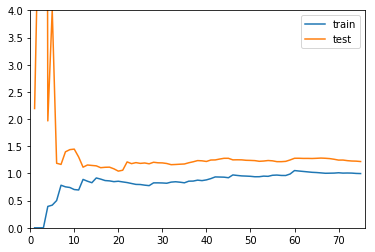

In [51]:
poly_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly_reg, X_train, X_test, y_train, y_test)

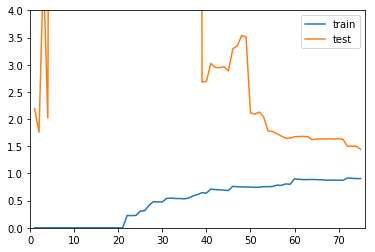

In [52]:
poly_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly_reg, X_train, X_test, y_train, y_test)